In [1]:
from L96_model import L96, L96_eq1_xdot # L96 provides the "real world", L96_eq1_xdot is needed in our "GCM"
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setting the seed gives us reproducible results
np.random.seed(13)

# Create a "real world" with K=8 and J=32
W = L96(8, 32, F=18)

# Run "real world" for 3 days to forget initial conditons
# (store=True save the final state as an initial condition for the next run)
W.run(0.05, 3., store=True);

# From here on we can use W.X as perfect initial conditions for a model and sample the real world using W.run(dt,T)

The following function implements our complete model which is
\begin{align}
\frac{1}{\Delta t} \left( X_k^{n+1} - X_k^n \right)
&= - X_{k-1}^n \left( X_{k-2}^n - X_{k+1}^n \right) - X_k^n + F - P\left( X_k^n \right)
\end{align}
where $n$ is the discrete time level (time $t=n\Delta t$) and we're using an Euler-forward integration method for simplicity and to ensure we have an imperfect model.

In [3]:
# X0 - initial conditions, dt - time increment, nt - number of forward steps to take
# param - parameters in our parameterization
def GCM(X0, F, dt, nt, param=[0]):
    time, hist, X = dt*np.arange(nt+1), np.zeros((nt+1,len(X0)))*np.nan, X0.copy()
    hist[0] = X
    
    for n in range(nt):
        X = X + dt * ( L96_eq1_xdot(X, F) - np.polyval(param, X) )

        hist[n+1], time[n+1] = X, dt*(n+1)
    return hist, time

In [4]:
F, dt, T = 18, 0.01, 10.
X,t = GCM(W.X, F, dt, int(T/dt), param=[0.85439536, 0.75218026])

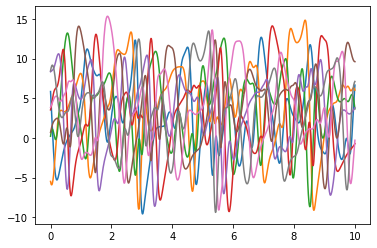

In [5]:
plt.plot(t, X);

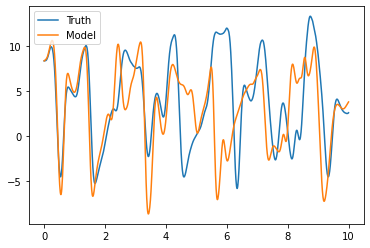

In [6]:
# This samples the real world with the same time interval as "dt" used by the model
Xtrue,_,_ = W.run(dt, T)

plt.plot(t, Xtrue[:,4], label='Truth');
plt.plot(t, X[:,4], label='Model');
plt.legend();